## Steps :

1. Import Libraries
2. Load data
2. Handle missing values if present
3. Categorical to numerical
4. Features Engineering / Feature Selecction
5. Split dataset into train and test data
6. Create an object of ml algorithm
7. Fit and predict
8. Calculate the accuracy_score
9. Draw ROC curve.
10. Model deployment using Gradio

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

import warnings
warnings.filterwarnings('ignore')

## 2. Load data

In [2]:
traindf = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')

In [3]:
traindf.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [4]:
testdf.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1


In [5]:
traindf.shape

(1628, 29)

In [6]:
testdf.shape

(470, 28)

## 3. Handling Missing values

In [7]:
traindf.isna().sum()

Id                         0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

In [8]:
testdf.isna().sum()

Id                         0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

<AxesSubplot:>

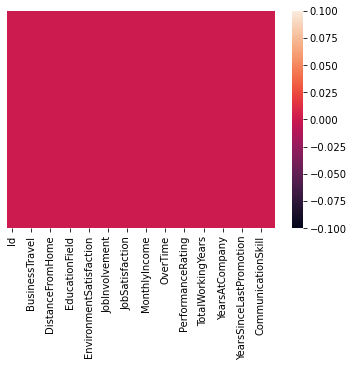

In [9]:
sns.heatmap(testdf.isnull(), yticklabels = False)

There is no null value in train and test data.

## 4. Categorical to numerical

In [10]:
nominal_catg_col = list(traindf.select_dtypes(['object']).columns)
print(nominal_catg_col)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


#### labelEncoder

In [11]:
for column in traindf.columns:
    if traindf[column].dtype == np.number:
        continue
    traindf[column] = LabelEncoder().fit_transform(traindf[column]) 

## 5. Features Engineering / Feature Selecction

<AxesSubplot:>

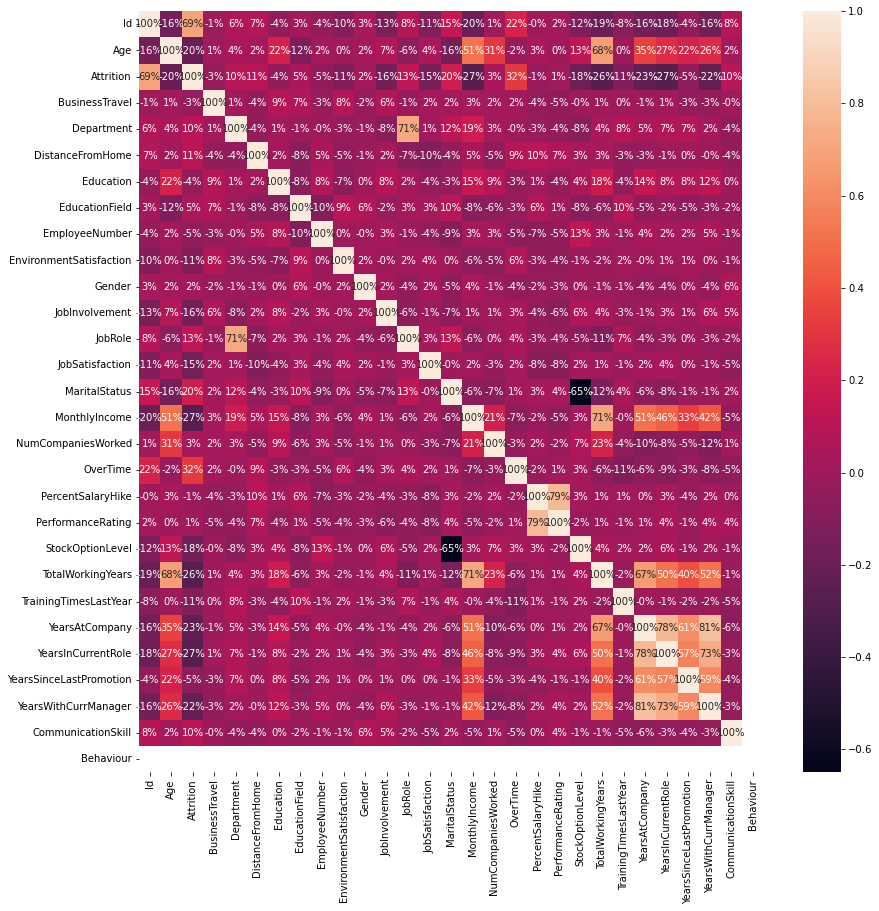

In [12]:
plt.figure(figsize=(14,14))
sns.heatmap(traindf.corr(), annot=True, fmt='.0%')

In [13]:
cols = ['Id', 'EmployeeNumber', 'Behaviour']

traindf.drop(traindf[cols], axis = 1, inplace=True)
testdf.drop(testdf[cols], axis = 1, inplace = True)

## 6. Split dataset into train and test data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(traindf.drop('Attrition', axis=1),traindf['Attrition'], test_size = 0.30)

## LogisticRegression Model

7. Create an object of ml algorithm 
8. Fit and predict
9. Calculate the accuracy_score
10. Draw ROC curve.

Accuracy of the model is: 0.7689161554192229


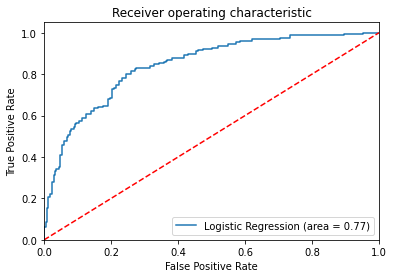

In [15]:
model_1 = LogisticRegression()    #Create an object of ml algorithm

model_1.fit(X_train, y_train)            #train our model
preds_1 = model_1.predict(X_test)        #testing our model

accuracy_1 = accuracy_score(y_test, preds_1)  #calculate accuracy 
print("Accuracy of the model is:", accuracy_1)

rf_roc_auc_1 = roc_auc_score(y_test, model_1.predict(X_test)) 

rf_fpr_1, rf_tpr_1, rf_thresholds_1 = roc_curve(y_test,model_1.predict_proba(X_test)[:,1])
plt.figure()

plt.plot(rf_fpr_1, rf_tpr_1, label='Logistic Regression (area = %0.2f)' % rf_roc_auc_1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('ROC')
plt.show()

## DecisionTree Model

7. Create an object of ml algorithm 
8. Fit and predict
9. Calculate the accuracy_score
10. Draw ROC curve.

Accuracy of the model is: 0.9263803680981595


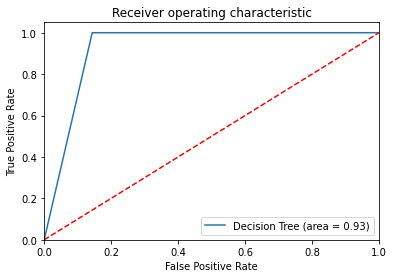

In [16]:
model_2 = DecisionTreeClassifier()     #Create an object of ml algorithm

model_2.fit(X_train, y_train)            #train our model
preds_2 = model_2.predict(X_test)        #testing our model

accuracy_2 = accuracy_score(y_test, preds_2)   #calculate accuracy 
print("Accuracy of the model is:", accuracy_2)

rf_roc_auc_2 = roc_auc_score(y_test, model_2.predict(X_test))

rf_fpr_2, rf_tpr_2, rf_thresholds_2 = roc_curve(y_test,model_2.predict_proba(X_test)[:,1])
plt.figure()

plt.plot(rf_fpr_2, rf_tpr_2, label='Decision Tree (area = %0.2f)' % rf_roc_auc_2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('ROC')
plt.show()

## RandomForest Model

7. Create an object of ml algorithm 
8. Fit and predict
9. Calculate the accuracy_score
10. Draw ROC curve.

Accuracy of the model is: 0.967280163599182


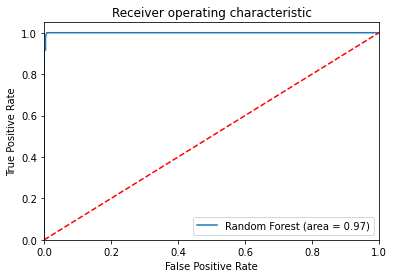

In [17]:
model_3 = RandomForestClassifier(n_estimators=250, random_state=79)   #Create an object of ml algorithm

model_3.fit(X_train, y_train)            #train our model
preds_3 = model_3.predict(X_test)        #testing our model

accuracy_3 = accuracy_score(y_test, preds_3)  #calculate accuracy
print("Accuracy of the model is:", accuracy_3)

rf_roc_auc_3 = roc_auc_score(y_test, model_3.predict(X_test))

rf_fpr_3, rf_tpr_3, rf_thresholds_3 = roc_curve(y_test,model_3.predict_proba(X_test)[:,1])
plt.figure()

plt.plot(rf_fpr_3, rf_tpr_3, label='Random Forest (area = %0.2f)' % rf_roc_auc_3)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('ROC')
plt.show()

## 10. Model deployment using Gradio

In [18]:
print(traindf.columns) #geting our columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'CommunicationSkill'],
      dtype='object')


In [19]:
def EmployeeAttrition(Age,BusinessTravel,Department,DistanceFromHome,
       Education, EducationField,EnvironmentSatisfaction,Gender,
       JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,
       MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,
       PerformanceRating,StockOptionLevel,TotalWorkingYears,
       TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,
       YearsSinceLastPromotion,YearsWithCurrManager, CommunicationSkill):
    
    #turning the arguments into a numpy array  
    X = np.array([Age,BusinessTravel,Department,DistanceFromHome,
       Education, EducationField,EnvironmentSatisfaction,Gender,
       JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,
       MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,
       PerformanceRating,StockOptionLevel,TotalWorkingYears,
       TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,
       YearsSinceLastPromotion,YearsWithCurrManager, CommunicationSkill])
    
    
    prediction = model_3.predict(X.reshape(1,-1))
    return prediction

In [20]:
attrition = gr.outputs.Textbox()

app = gr.Interface(fn=EmployeeAttrition, inputs=['number','number','number','number','number','number','number','number','number','number',
                                                'number','number','number','number','number','number','number','number','number','number',
                                                'number','number','number','number','number'],
                   outputs=attrition, description="Check the attrition of the employee with theses features")

In [21]:
app.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
